<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/CV_Convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writting algorithms which can discover patterns in visual data. such as cameras of self-driving cars recognizing the object in front.

**Getting the data**

In [64]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## Unizip downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-04-25 12:35:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  23.5MB/s    in 5.5s    

2024-04-25 12:35:06 (18.9 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



We are using food 101 data from kaggle

In [65]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [66]:
## Finding out how many images are there in the file
import os
num_images_train_pizza = len(os.listdir('pizza_steak/train/pizza'))
num_images_train_pizza

750

To visualize our images, first get the class names programmatically

In [67]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Creates a list of class names from the subdirectory in the training folder
print(class_names)

['pizza' 'steak']


In [68]:
## Visualizing our images
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random

def view_rand_images(target_dir, target_class):
  target_folder = target_dir +'/'+  target_class

  # getting the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(">", random_image)

  ## reading the image and ploting it
  img = mping.imread(target_folder +'/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape: {img.shape}")
  return img

> ['2667255.jpg']
Image shape: (384, 512, 3)


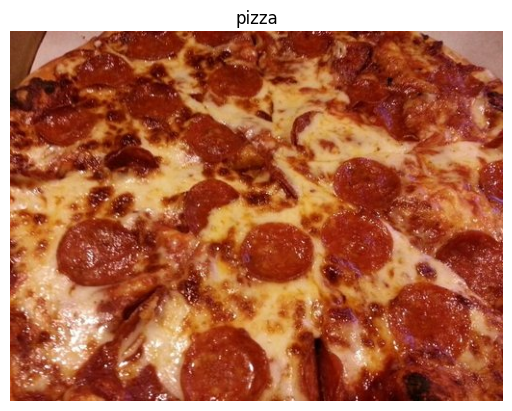

In [69]:
rand_image = view_rand_images('pizza_steak/train', 'pizza')

In [70]:
print(rand_image)

[[[120  63  36]
  [115  58  31]
  [112  55  28]
  ...
  [167 117 108]
  [164 114 105]
  [160 110 101]]

 [[118  61  34]
  [114  57  30]
  [112  55  28]
  ...
  [165 115 106]
  [163 113 104]
  [161 111 102]]

 [[115  57  33]
  [114  56  32]
  [114  56  32]
  ...
  [162 114 104]
  [162 114 104]
  [162 114 104]]

 ...

 [[181  76  31]
  [178  75  32]
  [172  69  28]
  ...
  [117  40  24]
  [107  29  16]
  [ 96  18   5]]

 [[182  77  30]
  [182  80  32]
  [179  76  31]
  ...
  [127  50  30]
  [122  45  27]
  [109  34  15]]

 [[184  79  31]
  [188  86  37]
  [189  86  41]
  ...
  [127  51  28]
  [126  51  30]
  [116  41  20]]]


In [71]:
# print(rand_image)(224, 224, 3) --> 255 Height 255 Width 3 color channels.
## each values in the array elements represents the color channels of every pixel
## ex: [ 58  43  20] one pixel with color 58 red, 43 green, 20 blue

Machine learning and neural network prefers the values with between 0 and 1. (normalizing)

## Building Convolutional Neural Network

* Loading the images
* Preprocessing the images (image values)
* Building a CNN
* Compiling the CNN
* fitting the CNN

**Using google's T4 GPU**

In [72]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

## Preprocessing the data (scaling/normalize)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

## Setup paths to our directory
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

## Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)


## Building the CNN (same as the Tiny VGG on CNN explainer website)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)), ## Input layer
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compile our CNN
model.compile(
    loss='binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

## fit
model.fit(train_data, ## the flow_from_directory() will automatically create the labels
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = valid_data,
          validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 161ms/step - loss: 0.6049 - accuracy: 0.6587 - val_loss: 0.4995 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4794 - accuracy: 0.7807 - val_loss: 0.4050 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4395 - accuracy: 0.8027 - val_loss: 0.3852 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 7s 146ms/step - loss: 0.3968 - accuracy: 0.8280 - val_loss: 0.3562 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3295 - accuracy: 0.8687 - val_loss: 0.3735 - val_accuracy: 0.8420


In [73]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_43 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                

## Understanding the above Deeply

In [74]:
## Defining the directory path
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

Next step is to turn our data into **batchs**.

batch is a small subset of data, Rather look at all the images at one time, a model might look 32 at a time.

* all the images might not fit into the memoryof our processor, so we give model batch by batch.

* Trying to learn the patterns in all the images in one hit could result in the model not being able to learn very well.


In [75]:
## Creating train data test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [76]:
## Load in our data from our directory and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, ## target directory
                                               batch_size = 32,
                                               target_size = (224, 224), ## target size (height, width)
                                               class_mode = 'binary', ## type of data you're working with
                                               seed = 42)  ## size of minibatchs to load data into

test_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [77]:
## Get a sample of train data batch
images, labels = train_data.next() # get the next "batch" of the images/labels in train_data
len(images), len(labels)

(32, 32)

In [78]:
## Get the first two images
images[0], images[0].shape

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.3137255 , 0.32941177, 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34509805, 0.3803922 ],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.38431376],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.3647059 , 0.40000004, 0.29411766],
         [0.38823533, 0.42352945, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.30980393],
         [0.30980393, 0.29803923, 0.2784314 ],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

##Creating CNN

In [79]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)), ## Input layer

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compile our CNN
model_2.compile(
    loss='binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

## fit
model_2.fit(train_data, ## the flow_from_directory() will automatically create the labels
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 134ms/step - loss: 1.0627 - accuracy: 0.6867 - val_loss: 0.4869 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4580 - accuracy: 0.8000 - val_loss: 0.4114 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3851 - accuracy: 0.8300 - val_loss: 0.3844 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3084 - accuracy: 0.8753 - val_loss: 0.3783 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.2144 - accuracy: 0.9247 - val_loss: 0.3412 - val_accuracy: 0.8540


In [80]:
len(train_data), len(test_data)

(47, 16)

In [81]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_45 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_46 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_13 (Flatten)        (None, 475240)            0         
                                                                 
 dense_13 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
